Name: Qiaochu Dai

Githubname: Levi519519

USCID: 7326115044

### 1. Tree-Based Methods
#### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [3]:
path_train='../data/aps_failure_training_set.csv'
path_test='../data/aps_failure_test_set.csv'
train_df=pd.read_csv(path_train,skiprows=20, na_values='na')
test_df=pd.read_csv(path_test,skiprows=20, na_values='na')

In [6]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (b) Data Preparation
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 1

##### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

Techniques: Mean, Median, or Mode Imputation; Forward Fill and Backward Fill; K-Nearest Neighbors; Regression Imputation

In [75]:
X_train=train_df.iloc[:,1:]
y_train=train_df.iloc[:,0]
X_test=test_df.iloc[:,1:]
y_test=test_df.iloc[:,0]

In [18]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

array([[7.66980000e+04, 8.00000000e-01, 2.13070644e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.30580000e+04, 4.00000000e-01, 0.00000000e+00, ...,
        1.50000000e+03, 0.00000000e+00, 0.00000000e+00],
       [4.10400000e+04, 0.00000000e+00, 2.28000000e+02, ...,
        5.14000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.12000000e+02, 0.00000000e+00, 2.13070643e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.02920000e+04, 8.00000000e-01, 2.13070643e+09, ...,
        3.88422000e+05, 0.00000000e+00, 0.00000000e+00],
       [4.02220000e+04, 8.00000000e-01, 6.98000000e+02, ...,
        1.58000000e+02, 0.00000000e+00, 0.00000000e+00]])

In [35]:
X_train_imputed=pd.DataFrame(X_train_imputed)
X_test_imputed=pd.DataFrame(X_test_imputed)
X_train_imputed.columns=X_train.columns
X_test_imputed.columns=X_test.columns
X_train_imputed

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.8,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.4,0.000000e+00,312.8,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.4,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,1.2,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.8,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.8,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


##### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [36]:
describe = X_train_imputed.describe(include='all')
for col in X_train_imputed.columns:
    std = describe.loc['std']
    mean = describe.loc['mean']
    describe.loc['CV'] = std / mean
describe.loc[['std','mean','CV']]

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
std,145430.056532,2.162526,7.829945e+08,3.504525e+07,158.761371,207.506347,20364.820851,34084.071732,149569.889231,757893.429450,...,1.151168e+06,541122.134921,1.163530e+06,1.116028e+06,1.064741e+06,1.720998e+06,447367.574219,47228.781490,4.303483,8.751996
mean,59336.499567,0.666693,3.754308e+08,1.435162e+05,7.012367,11.493360,220.111620,975.444353,8560.505247,88300.612720,...,4.443498e+05,210448.965480,4.442616e+05,3.924440e+05,3.323133e+05,3.454125e+05,137945.818507,8337.526040,0.093073,0.219813
CV,2.450938,3.243660,2.085589e+00,2.441901e+02,22.640198,18.054455,92.520426,34.942098,17.472087,8.583105,...,2.590679e+00,2.571275,2.619019e+00,2.843788e+00,3.204029e+00,4.982442e+00,3.243067,5.664604,46.237554,39.815581


##### iii. Plot a correlation matrix for your features using pandas or any other tool.

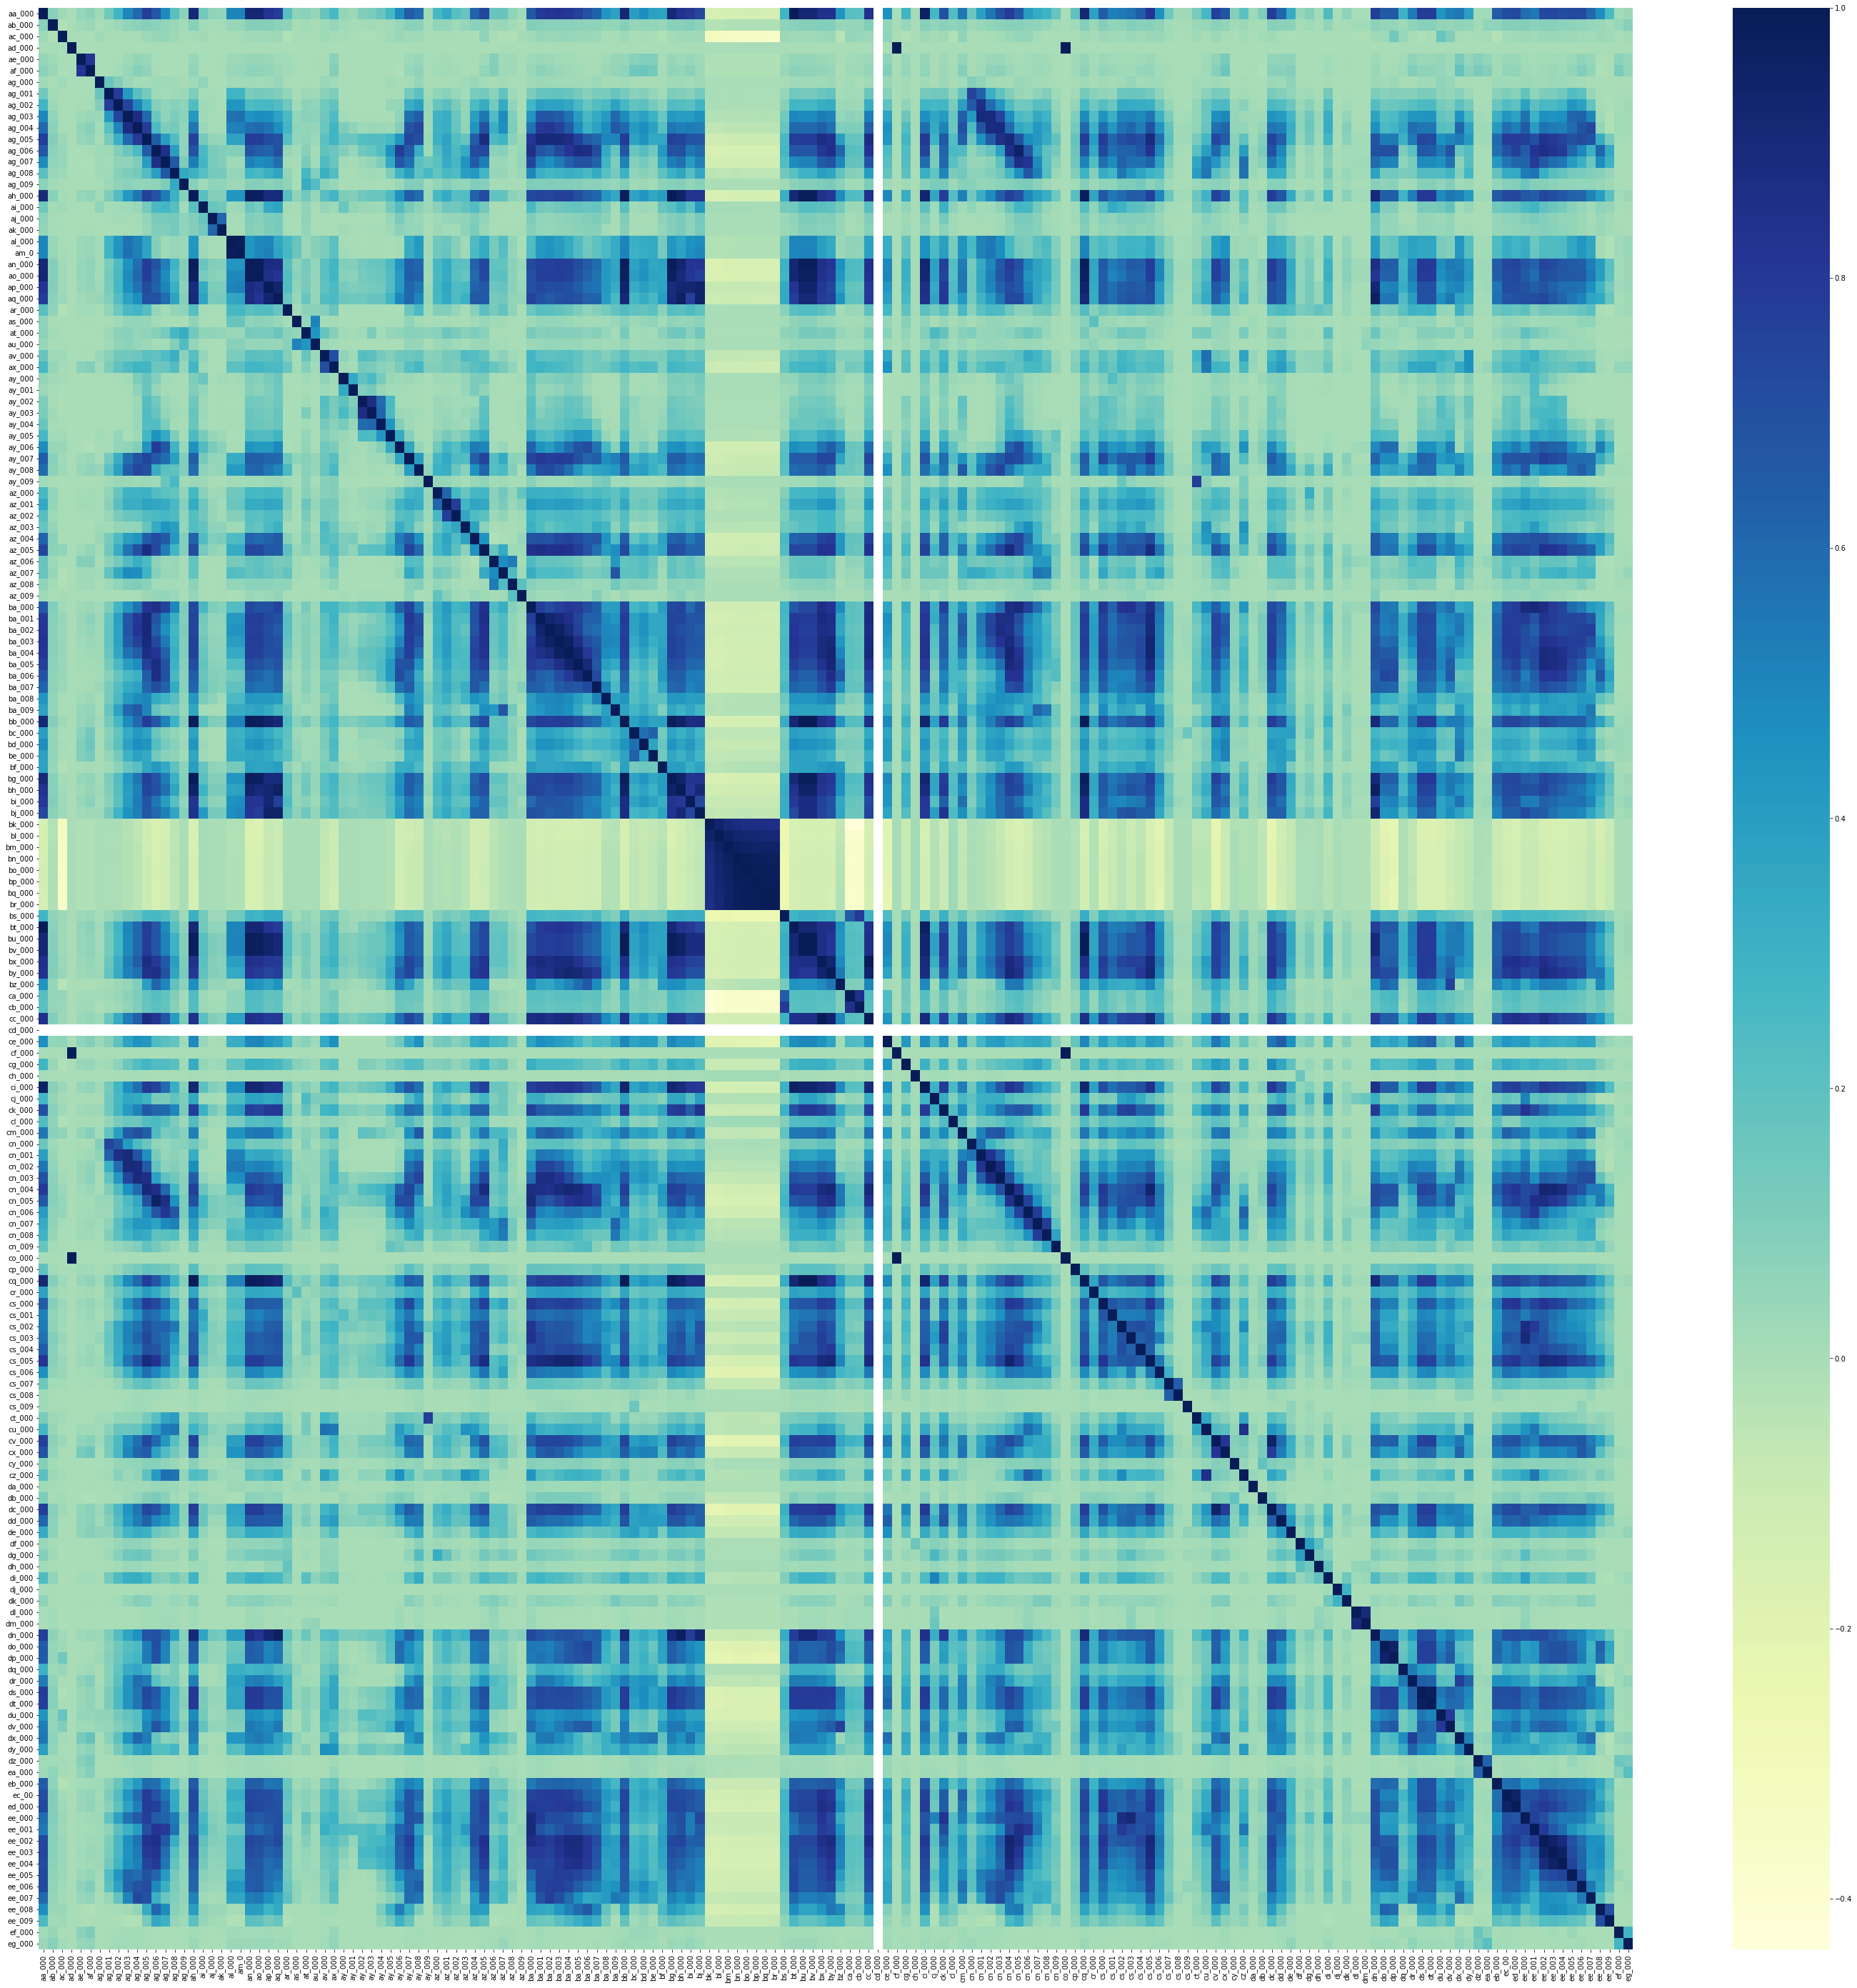

In [37]:
plt.figure(figsize=(50, 50))
corr = X_train_imputed.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

##### iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.


In [38]:
n = int(np.sqrt(170))
CV=describe.loc[['std','mean','CV']].T
sorted_CV = CV.sort_values(by='CV',ascending=False)
sorted_CV.iloc[:n,2]

cf_000    244.860684
co_000    244.328863
ad_000    244.190147
cs_009    237.928929
dj_000    110.462044
dh_000     94.135634
ag_000     92.520426
as_000     87.259630
ay_009     84.352604
az_009     77.715676
ch_000     73.506112
au_000     68.804652
ay_001     52.607252
Name: CV, dtype: float64

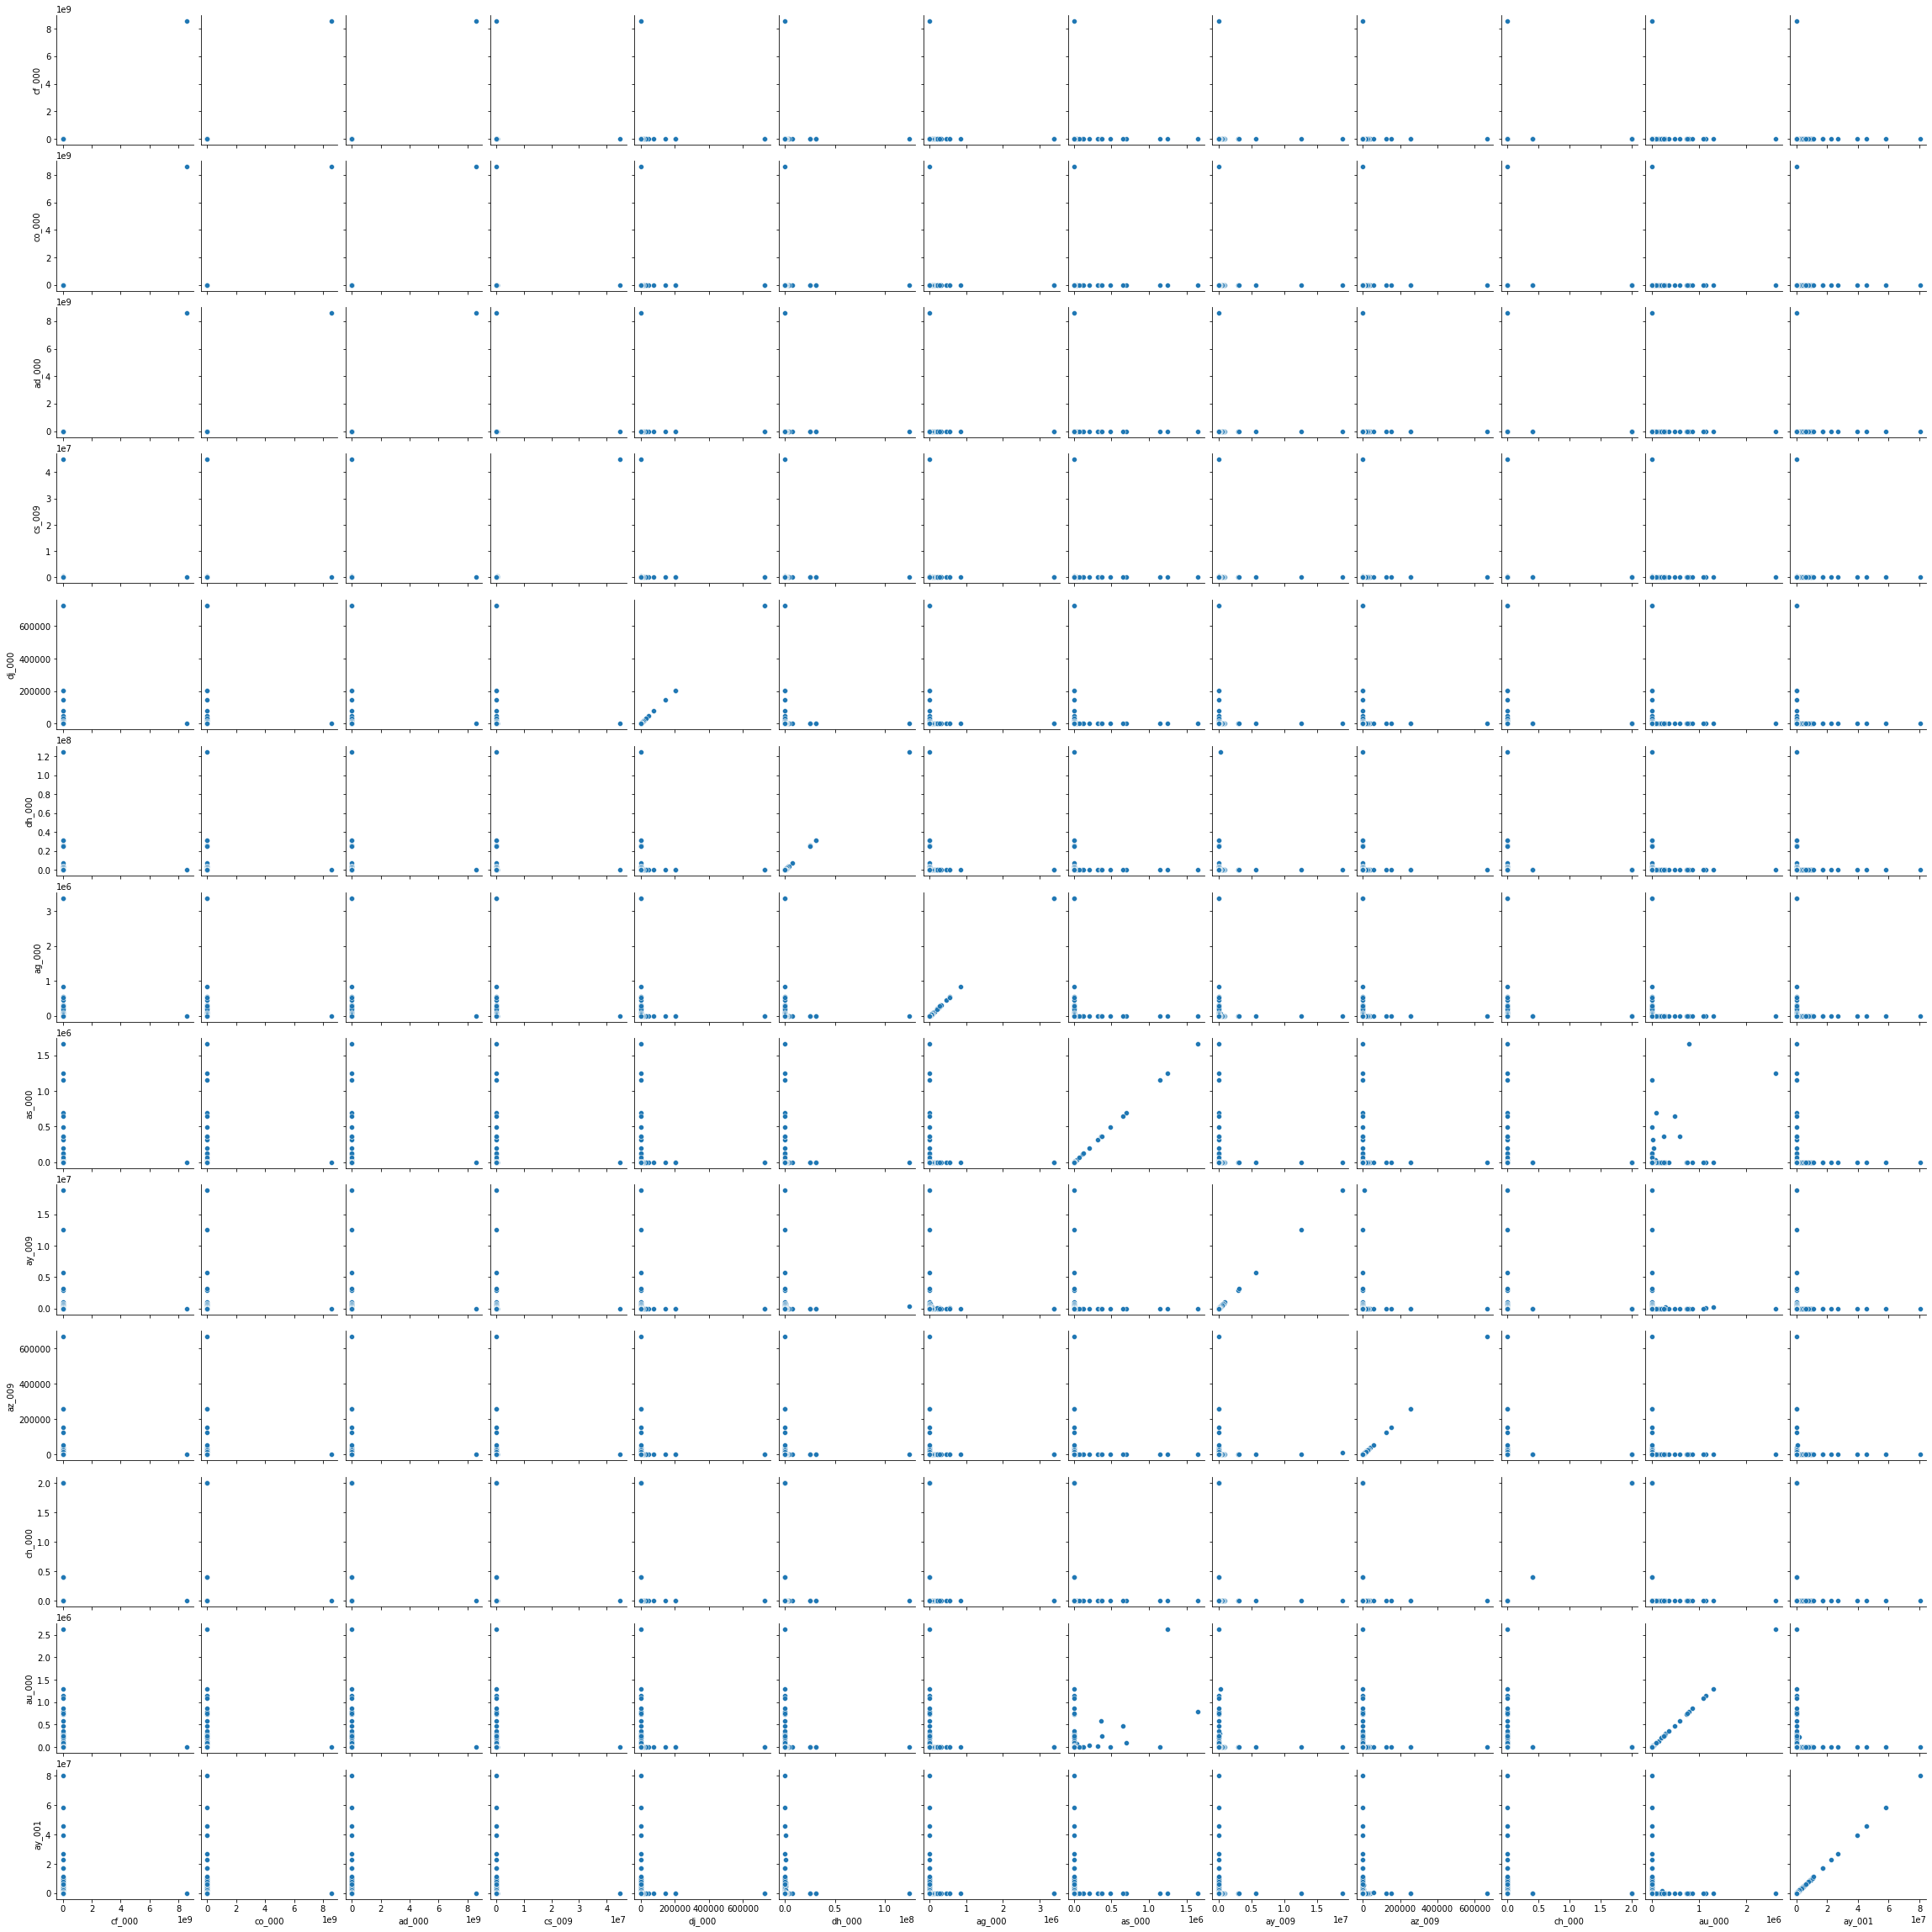

In [46]:
cols=sorted_CV.iloc[:n,2].index

#scatter plots
sns.pairplot(X_train_imputed[cols], diag_kind=None)
plt.show()

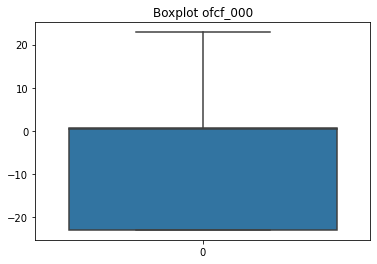

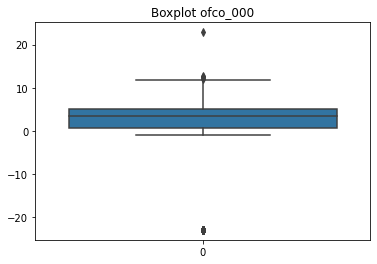

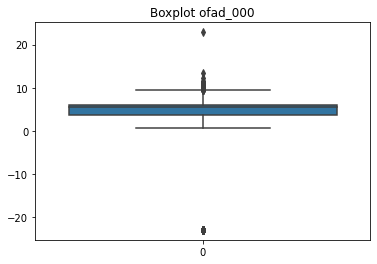

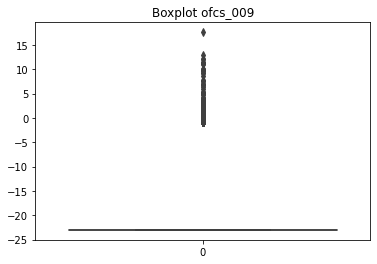

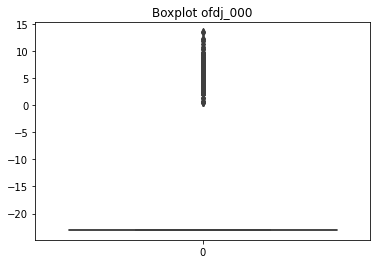

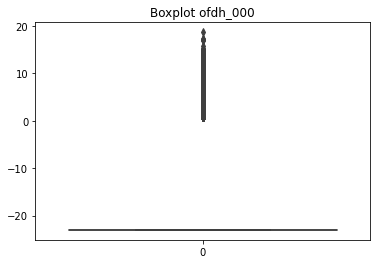

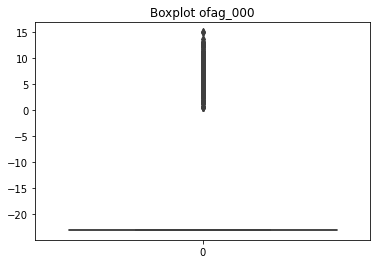

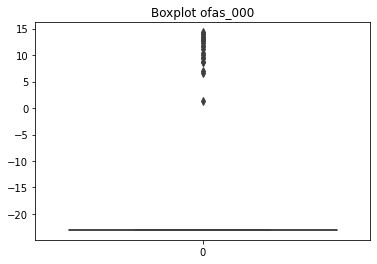

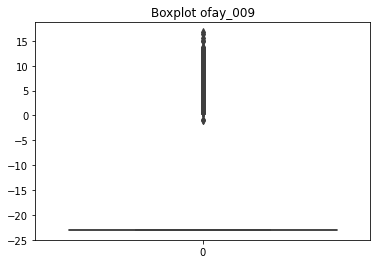

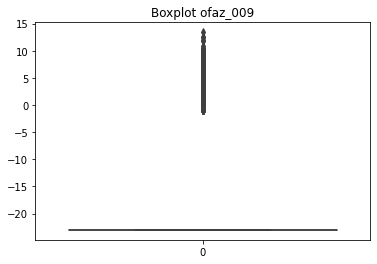

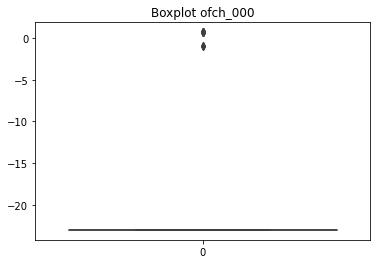

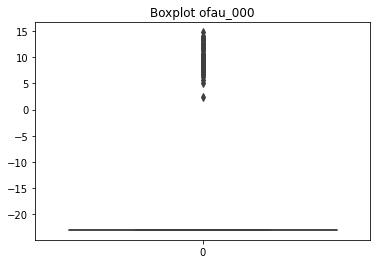

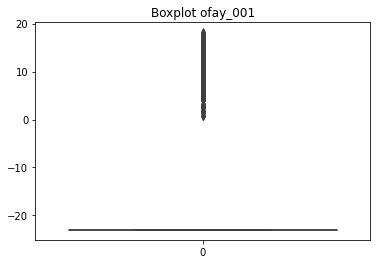

In [53]:
for col in cols:
    sns.boxplot(data=np.log(X_train_imputed[col]+ 1e-10), orient='v')
    plt.title("Boxplot of"+col)
    plt.show()

Answer: We can not make any conclusion about significance of those features just by the scatter plot. 

##### v. Determine the number of positive and negative data. Is this data set imbal- anced?

In [54]:
y_train.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [55]:
y_test.value_counts()

neg    15625
pos      375
Name: class, dtype: int64

Answer: Yes, data is highly imbalanced.

#### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [108]:
def get_rf_measures(X_train,y_train,X_test, y_test,get_test_error=False,XGB=False):
    global best_alpha
    if XGB:
        classifier=xgb.XGBClassifier(objective='binary:logistic',
                          reg_alpha=best_alpha,
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5,
                          use_label_encoder=False)
    else:
        classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    #confusion_matrix
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    #ROC curve and AUC
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, classifier.predict_proba(X_train)[:, 1])
    roc_auc_train = roc_auc_score(y_train, classifier.predict_proba(X_train)[:, 1])
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    roc_auc_test = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
    
    # Misclassification for training and test sets
    misclassification_train = 1 - accuracy_score(y_train, y_train_pred)
    misclassification_test = 1 - accuracy_score(y_test, y_test_pred)
    
    print('train confusion marrix: ')
    print(confusion_matrix_train)
    print('test confusion marrix: ')
    print(confusion_matrix_test)
    print('train error:')
    print(misclassification_train)
    print('test error:')
    print(misclassification_test)
    print('ROC and AUC')
    plt.figure(figsize=(10, 5))
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='train ROC curve (area = {:.2f})'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, color='darkblue', lw=2, label='test ROC curve (area = {:.2f})'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    if get_test_error:
        return misclassification_test

def get_OOB_error(X_train,y_train):
    classifier = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
    classifier.fit(X_train, y_train)
    oob_error_estimate = 1 - classifier.oob_score_
    return oob_error_estimate


train confusion marrix: 
[[59000     0]
 [    1   999]]
test confusion marrix: 
[[15609    16]
 [  120   255]]
train error:
1.666666666666483e-05
test error:
0.008499999999999952
ROC and AUC


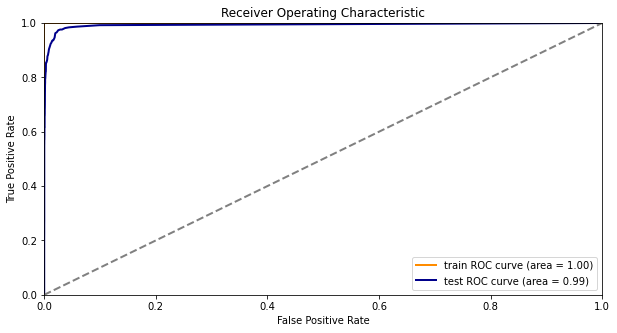

In [78]:
y_train=train_df.iloc[:,0]
y_test=test_df.iloc[:,0]
label_mapping = {'pos': 1, 'neg': 0}
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)
test_error=get_rf_measures(X_train_imputed,y_train,X_test_imputed, y_test,get_test_error=True)

In [80]:
result={
    'Out of Bag error':[get_OOB_error(X_train_imputed,y_train)],
    'test error':[test_error]
}
result=pd.DataFrame(result)
result

,Out of Bag error,test error
0,0.006,0.0085


##### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

1. Resampling:

(1) Oversampling the minority class: create additional copies of instances from the minority class to balance the class distribution. 

(2) Undersampling the majority class: reduce the number of instances from the majority class to match the minority class. 


2. Class weights:
assign different weights to classes. We can assign higher weights to the minority class, which penalizes misclassifying minority class instances more.

In [88]:
def perform_SMOTE(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=42) 
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

train confusion marrix: 
[[59000     0]
 [    0 59000]]
test confusion marrix: 
[[15533    92]
 [   69   306]]
train error:
0.0
test error:
0.010062499999999974
ROC and AUC


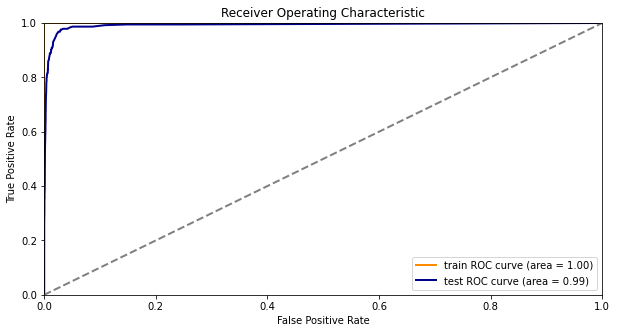

In [89]:
X_train_resampled, y_train_resampled=perform_SMOTE(X_train_imputed, y_train)
test_error_2=get_rf_measures(X_train_resampled,y_train_resampled,X_test_imputed, y_test,get_test_error=True)

In [90]:
result2={
    'Out of Bag error':[get_OOB_error(X_train_resampled,y_train_resampled)],
    'test error':[test_error_2]
}
result2=pd.DataFrame(result2)
result2

,Out of Bag error,test error
0,0.003364,0.010062


Answer: Test error increased after performing SMOTE. This probably bacause before performing SMOTE, the model was more 'willing' to predict 'neg' and since 'neg' label is much more than 'pos' label, the model had higher probability to 'guess' the label correctly.  

##### (e) XGBoost and Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰀j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [99]:
def get_best_alpha(param_grid,X_train,y_train):
    model=xgb.XGBClassifier(objective='binary:logistic',
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5,
                          use_label_encoder=False)
    cv = KFold(n_splits=5,shuffle=True,random_state=11)
    grid_cv = GridSearchCV(model, 
                           param_grid, 
                           n_jobs=-1, 
                           cv=cv, 
                           scoring="accuracy")
    grid_cv.fit(X_train, y_train)
    return grid_cv.best_params_,grid_cv.best_score_

In [94]:
ss = StandardScaler()
train_x_cols = X_train_imputed.columns
test_x_cols = X_test_imputed.columns
X_train_trans = pd.DataFrame(ss.fit_transform(X_train_imputed),columns=train_x_cols)
X_test_trans = pd.DataFrame(ss.fit_transform(X_test_imputed),columns=test_x_cols)

In [104]:
param_grid={ "reg_alpha": [0.01, 0.05,0.1,0.5,1, 5,10,50,100]}
alpha,cv_score=get_best_alpha(param_grid,X_train_trans,y_train)

In [118]:
best_alpha=alpha['reg_alpha']
print('best alpha = '+str(best_alpha))
print('training error = '+str(1-cv_score))

best alpha = 1
training error = 0.006016666666666781


train confusion marrix: 
[[58994     6]
 [   89   911]]
test confusion marrix: 
[[15597    28]
 [  114   261]]
train error:
0.001583333333333381
test error:
0.008874999999999966
ROC and AUC


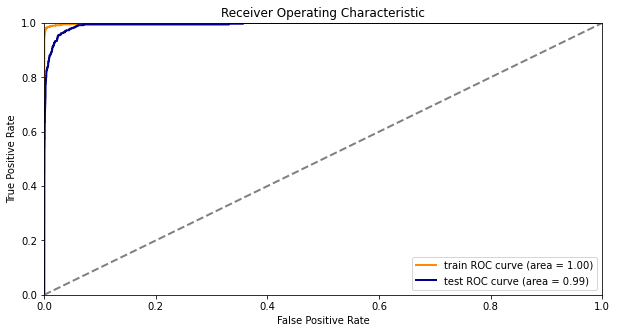

In [123]:
no_SMT_test_error=get_rf_measures(X_train_trans,y_train,X_test_trans, y_test,get_test_error=True,XGB=True)

#### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo- gistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.


In [119]:
X_train_SMT, y_train_SMT=perform_SMOTE(X_train_trans, y_train)

In [120]:
alpha,cv_score=get_best_alpha(param_grid,X_train_SMT,y_train_SMT)
best_alpha=alpha['reg_alpha']
print('best alpha = '+str(best_alpha))
print('training error = '+str(1-cv_score))

best alpha = 0.1
training error = 0.007000000000000006


train confusion marrix: 
[[58515   485]
 [   86 58914]]
test confusion marrix: 
[[14589  1036]
 [   16   359]]
train error:
0.004838983050847512
test error:
0.06574999999999998
ROC and AUC


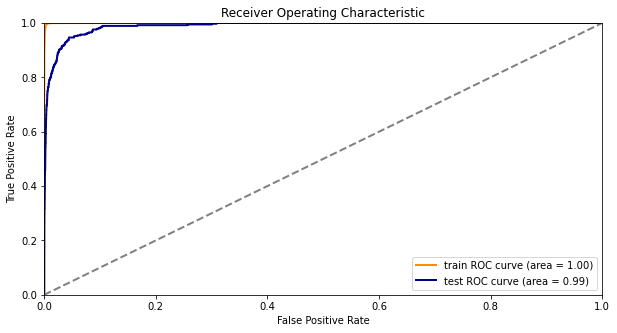

In [122]:
SMT_test_error=get_rf_measures(X_train_SMT,y_train_SMT,X_test_trans, y_test,get_test_error=True,XGB=True)

In [124]:
result3={
    'use SMOTE test error':[SMT_test_error],
    'not use SMOTE test error':[no_SMT_test_error]
}
result3=pd.DataFrame(result3)
result3

,use SMOTE test error,not use SMOTE test error
0,0.06575,0.008875


Answer: Same as using Random Forest, test error increased after performing SMOTE.

##### Suppose we estimate the regression coefficients in a linear regression model by minimizing for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

##### (a) As we increase s from 0, the training RSS will: 

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant.

Answer: training RSS will steadly increase. When S=0, model is overfitting and traning RSS will equal to the minimum value of RSS. When S increase, number of predictors decrease, model could not fit training data as well as when s=0. Thus, RSS will increase. 

##### (b) Repeat (a) for test RSS.

Answer: test RSS will decrease initially, and then eventually start increasing in a U shape. when S=0, model is overfitting and contribute to a large test RSS; when s increase, model could predict test data better and model become less overfitting, so test RSS decrease at first; when s continue increasing, model become less flexible and bias would increase quickly, so test RSS would increase. 

##### (c) Repeat (a) for variance.

Answer: Variance will steadily decrease. when s=0, model has highest complexity with highest variance. As s increase, model become less complex and therefore lower variance. 

##### (d) Repeat (a) for (squared) bias.

Answer: Due to the bias-variance trade-off and variance steadily decrease, bias would steadily increase. 

##### (e) Repeat (a) for the irreducible error.

Answer: Irreducible error will remain constant because it will not change due to change of model. 

### 3. ISLR 6.6.5
##### It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that n=2, p=2, x11=x12, x21=x22. Furthermore, suppose that y1+y2=0 and x11+x21=0 and x12+x22=0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: b0= 0.

a) Write out the ridge regression optimization problem in this setting.

b) Argue that in this setting, the ridge coefficient estimates satisfy 
.

c) Write out the lasso optimization problem in this setting.

d) Argue that in this setting, the lasso coefficients 
 and 
 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

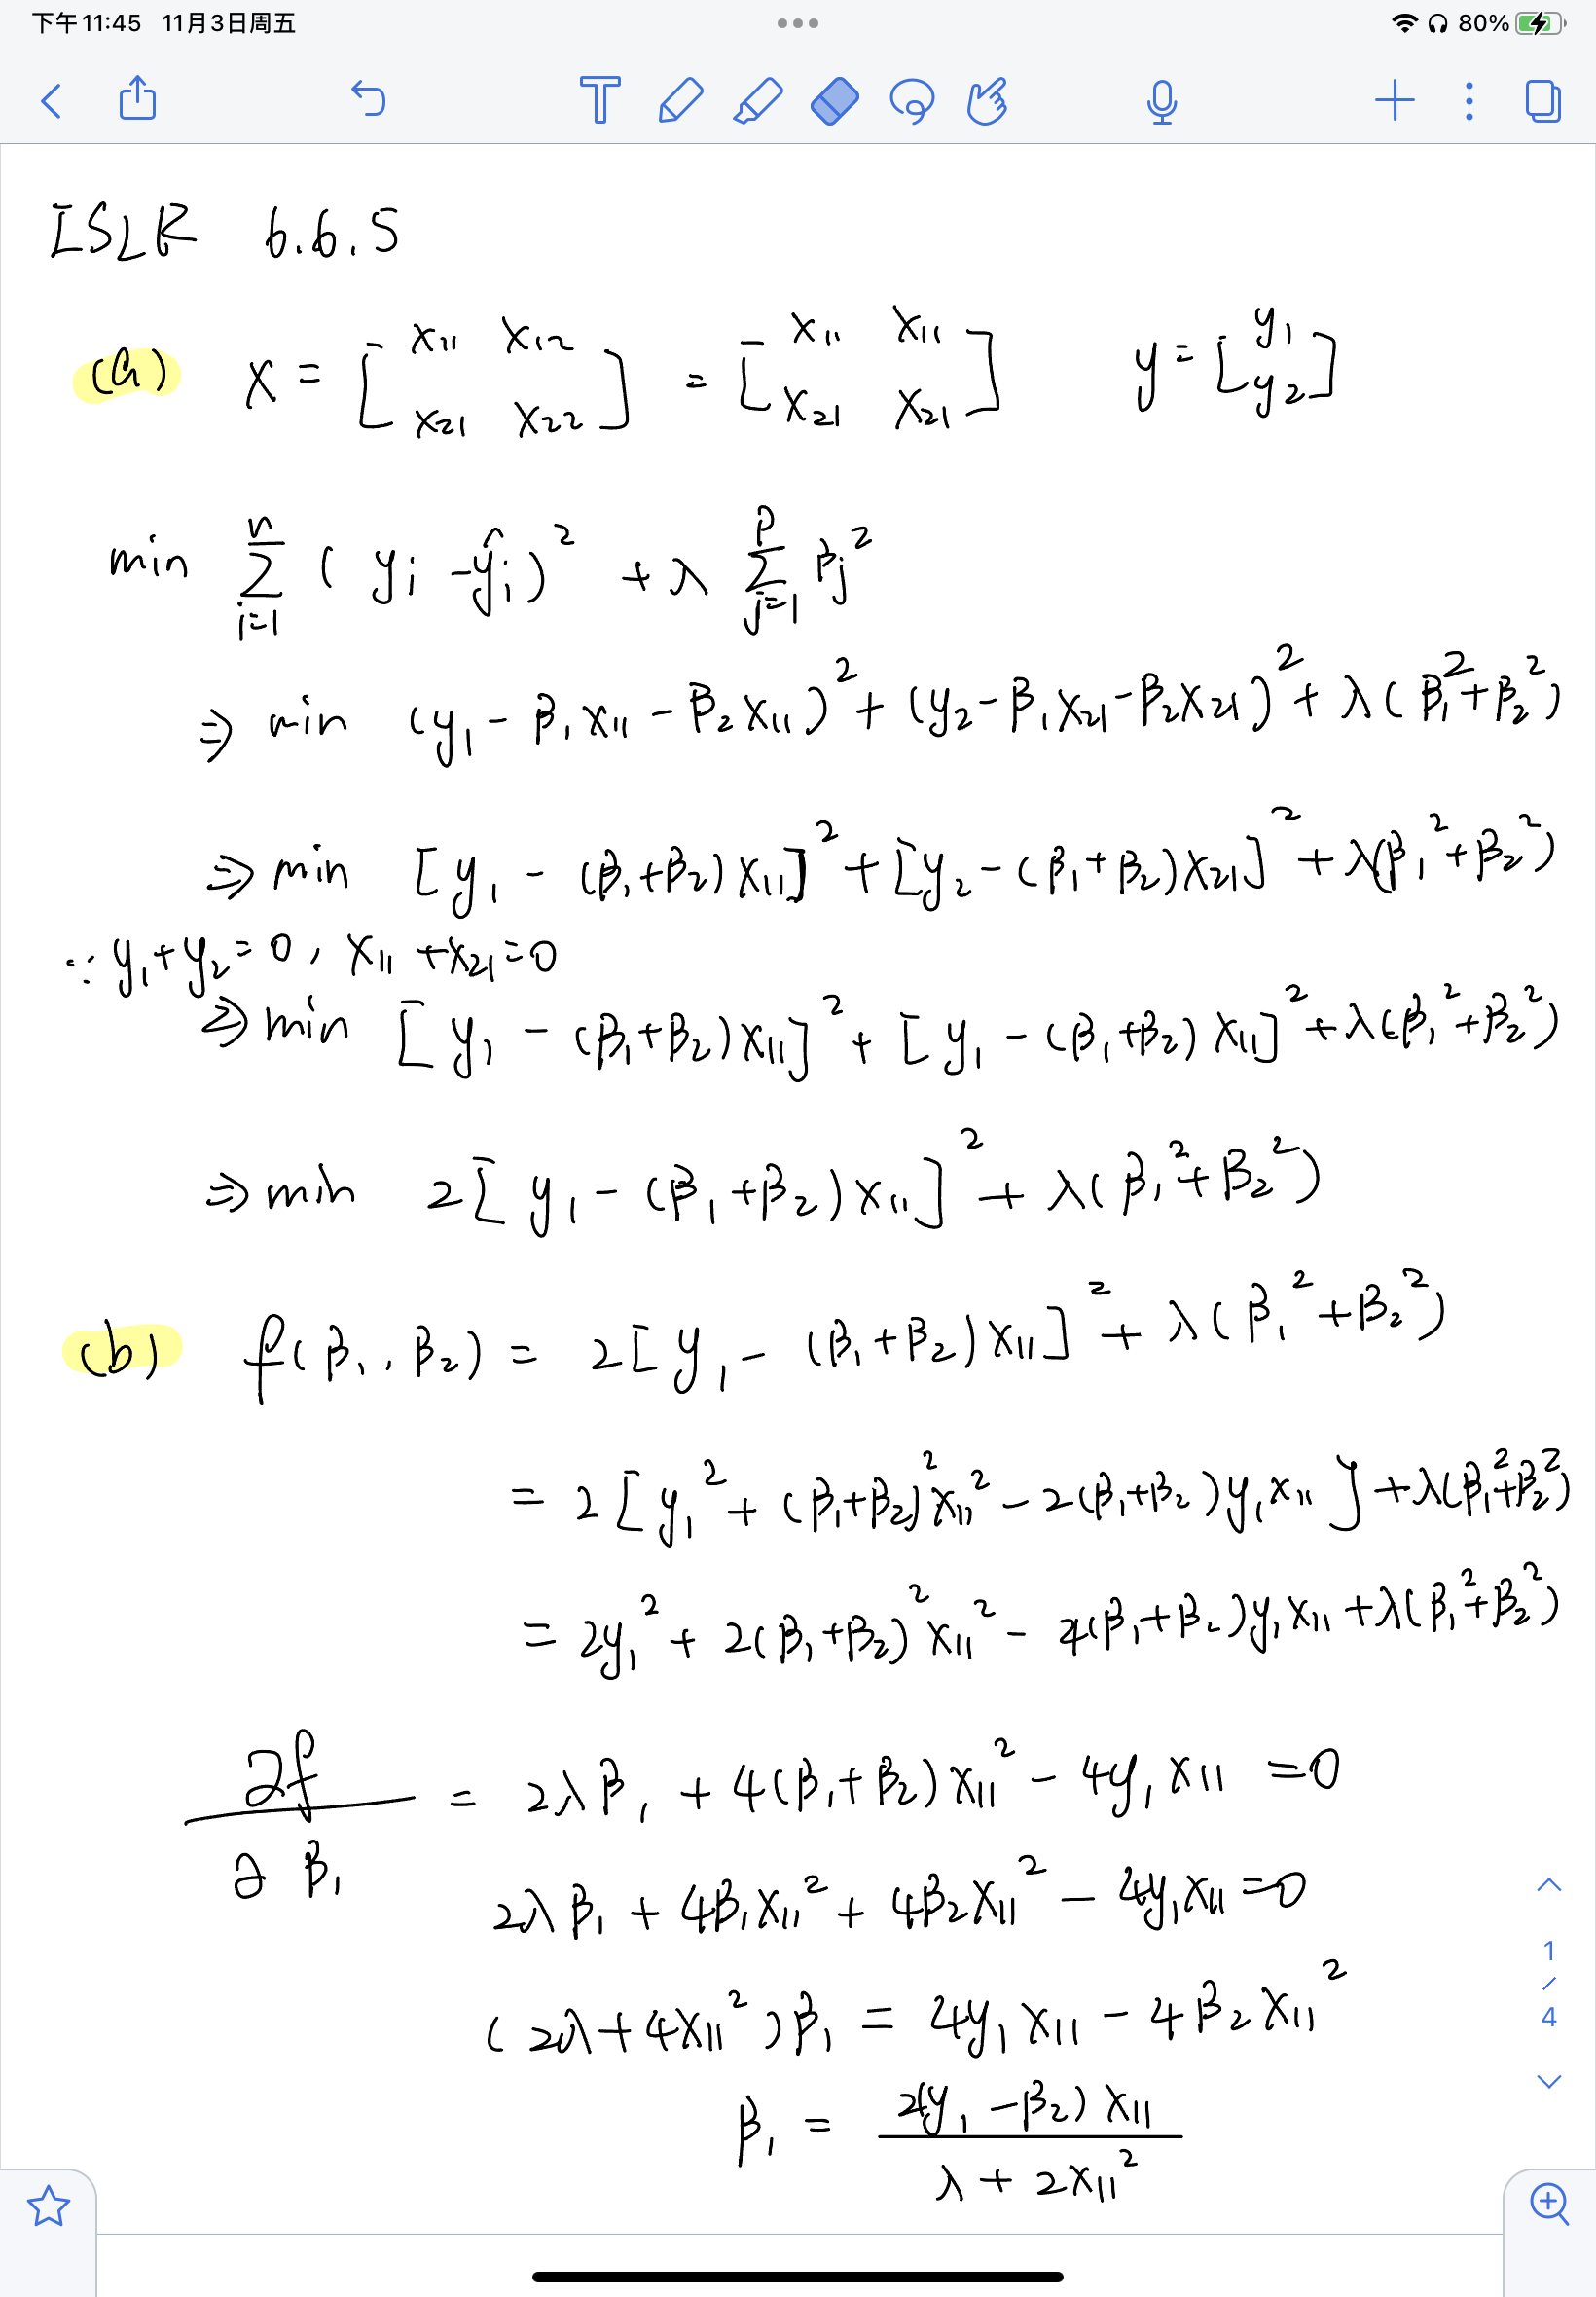

In [135]:
from IPython.display import display, Image
image_path = '/Users/daiqiaochu/Downloads/IMG_0257.PNG'

display(Image(filename=image_path, width=800, height=600))

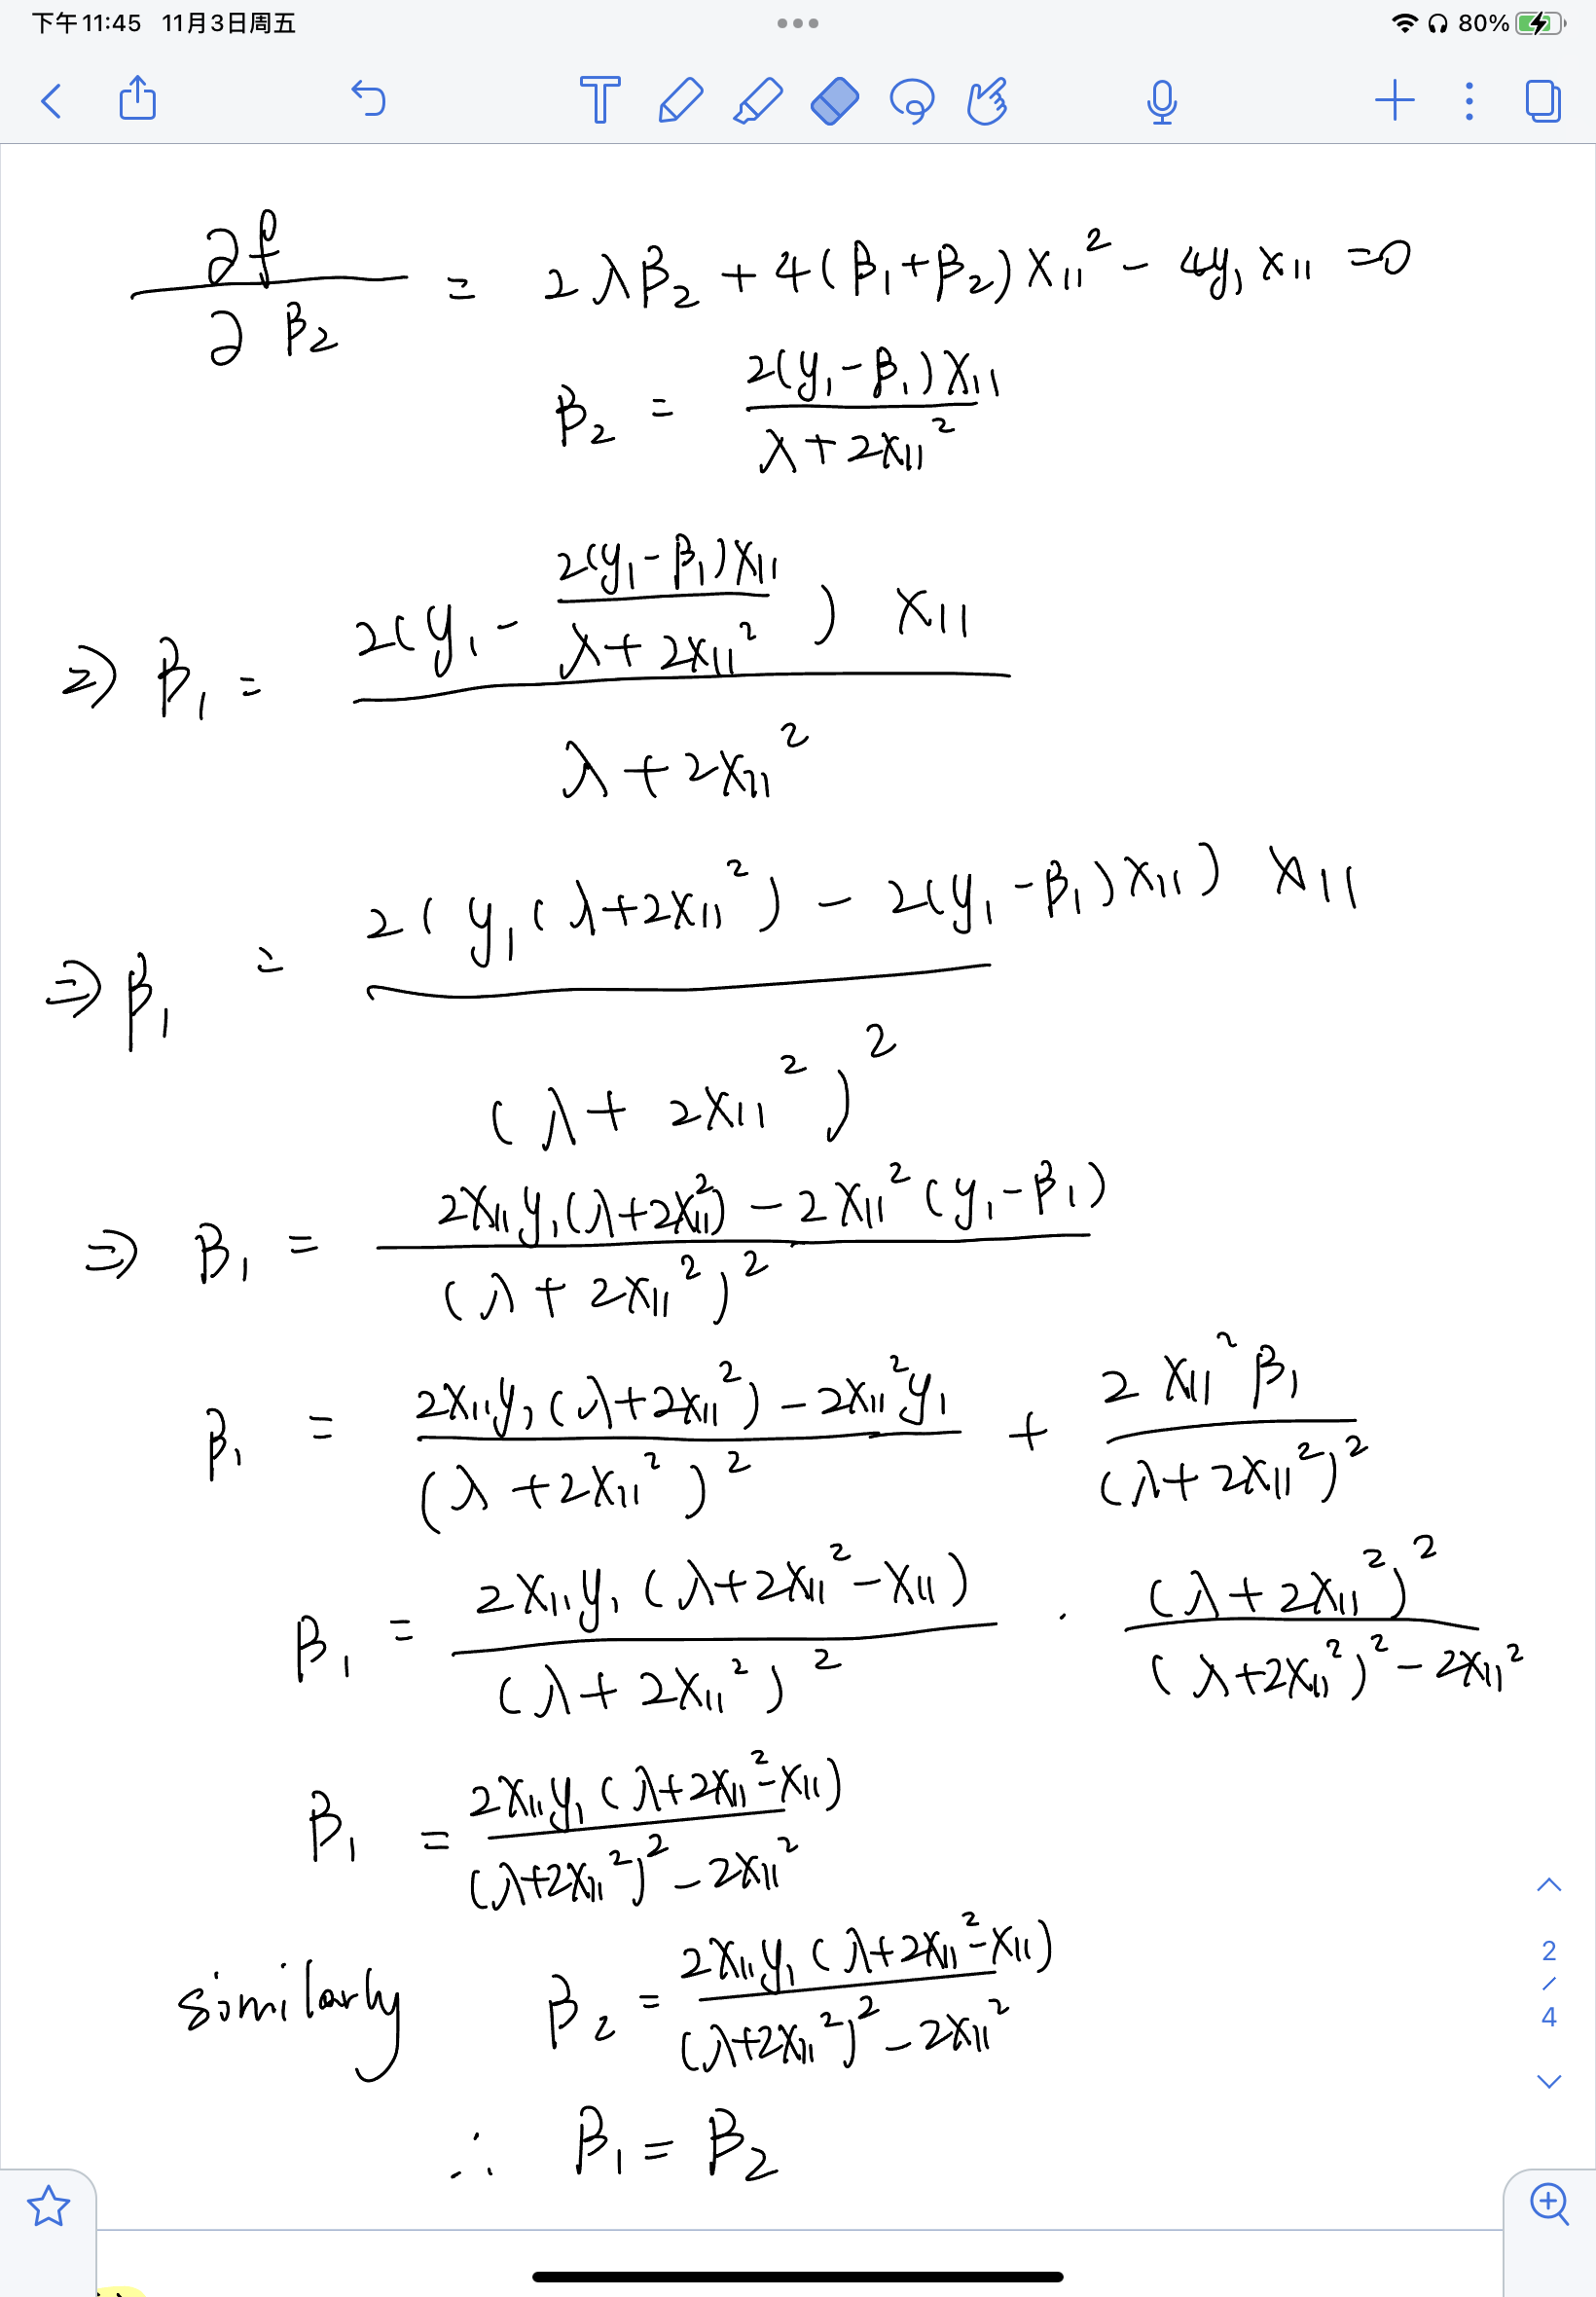

In [136]:
image_path = '/Users/daiqiaochu/Downloads/IMG_0258.PNG'

display(Image(filename=image_path, width=800, height=600))

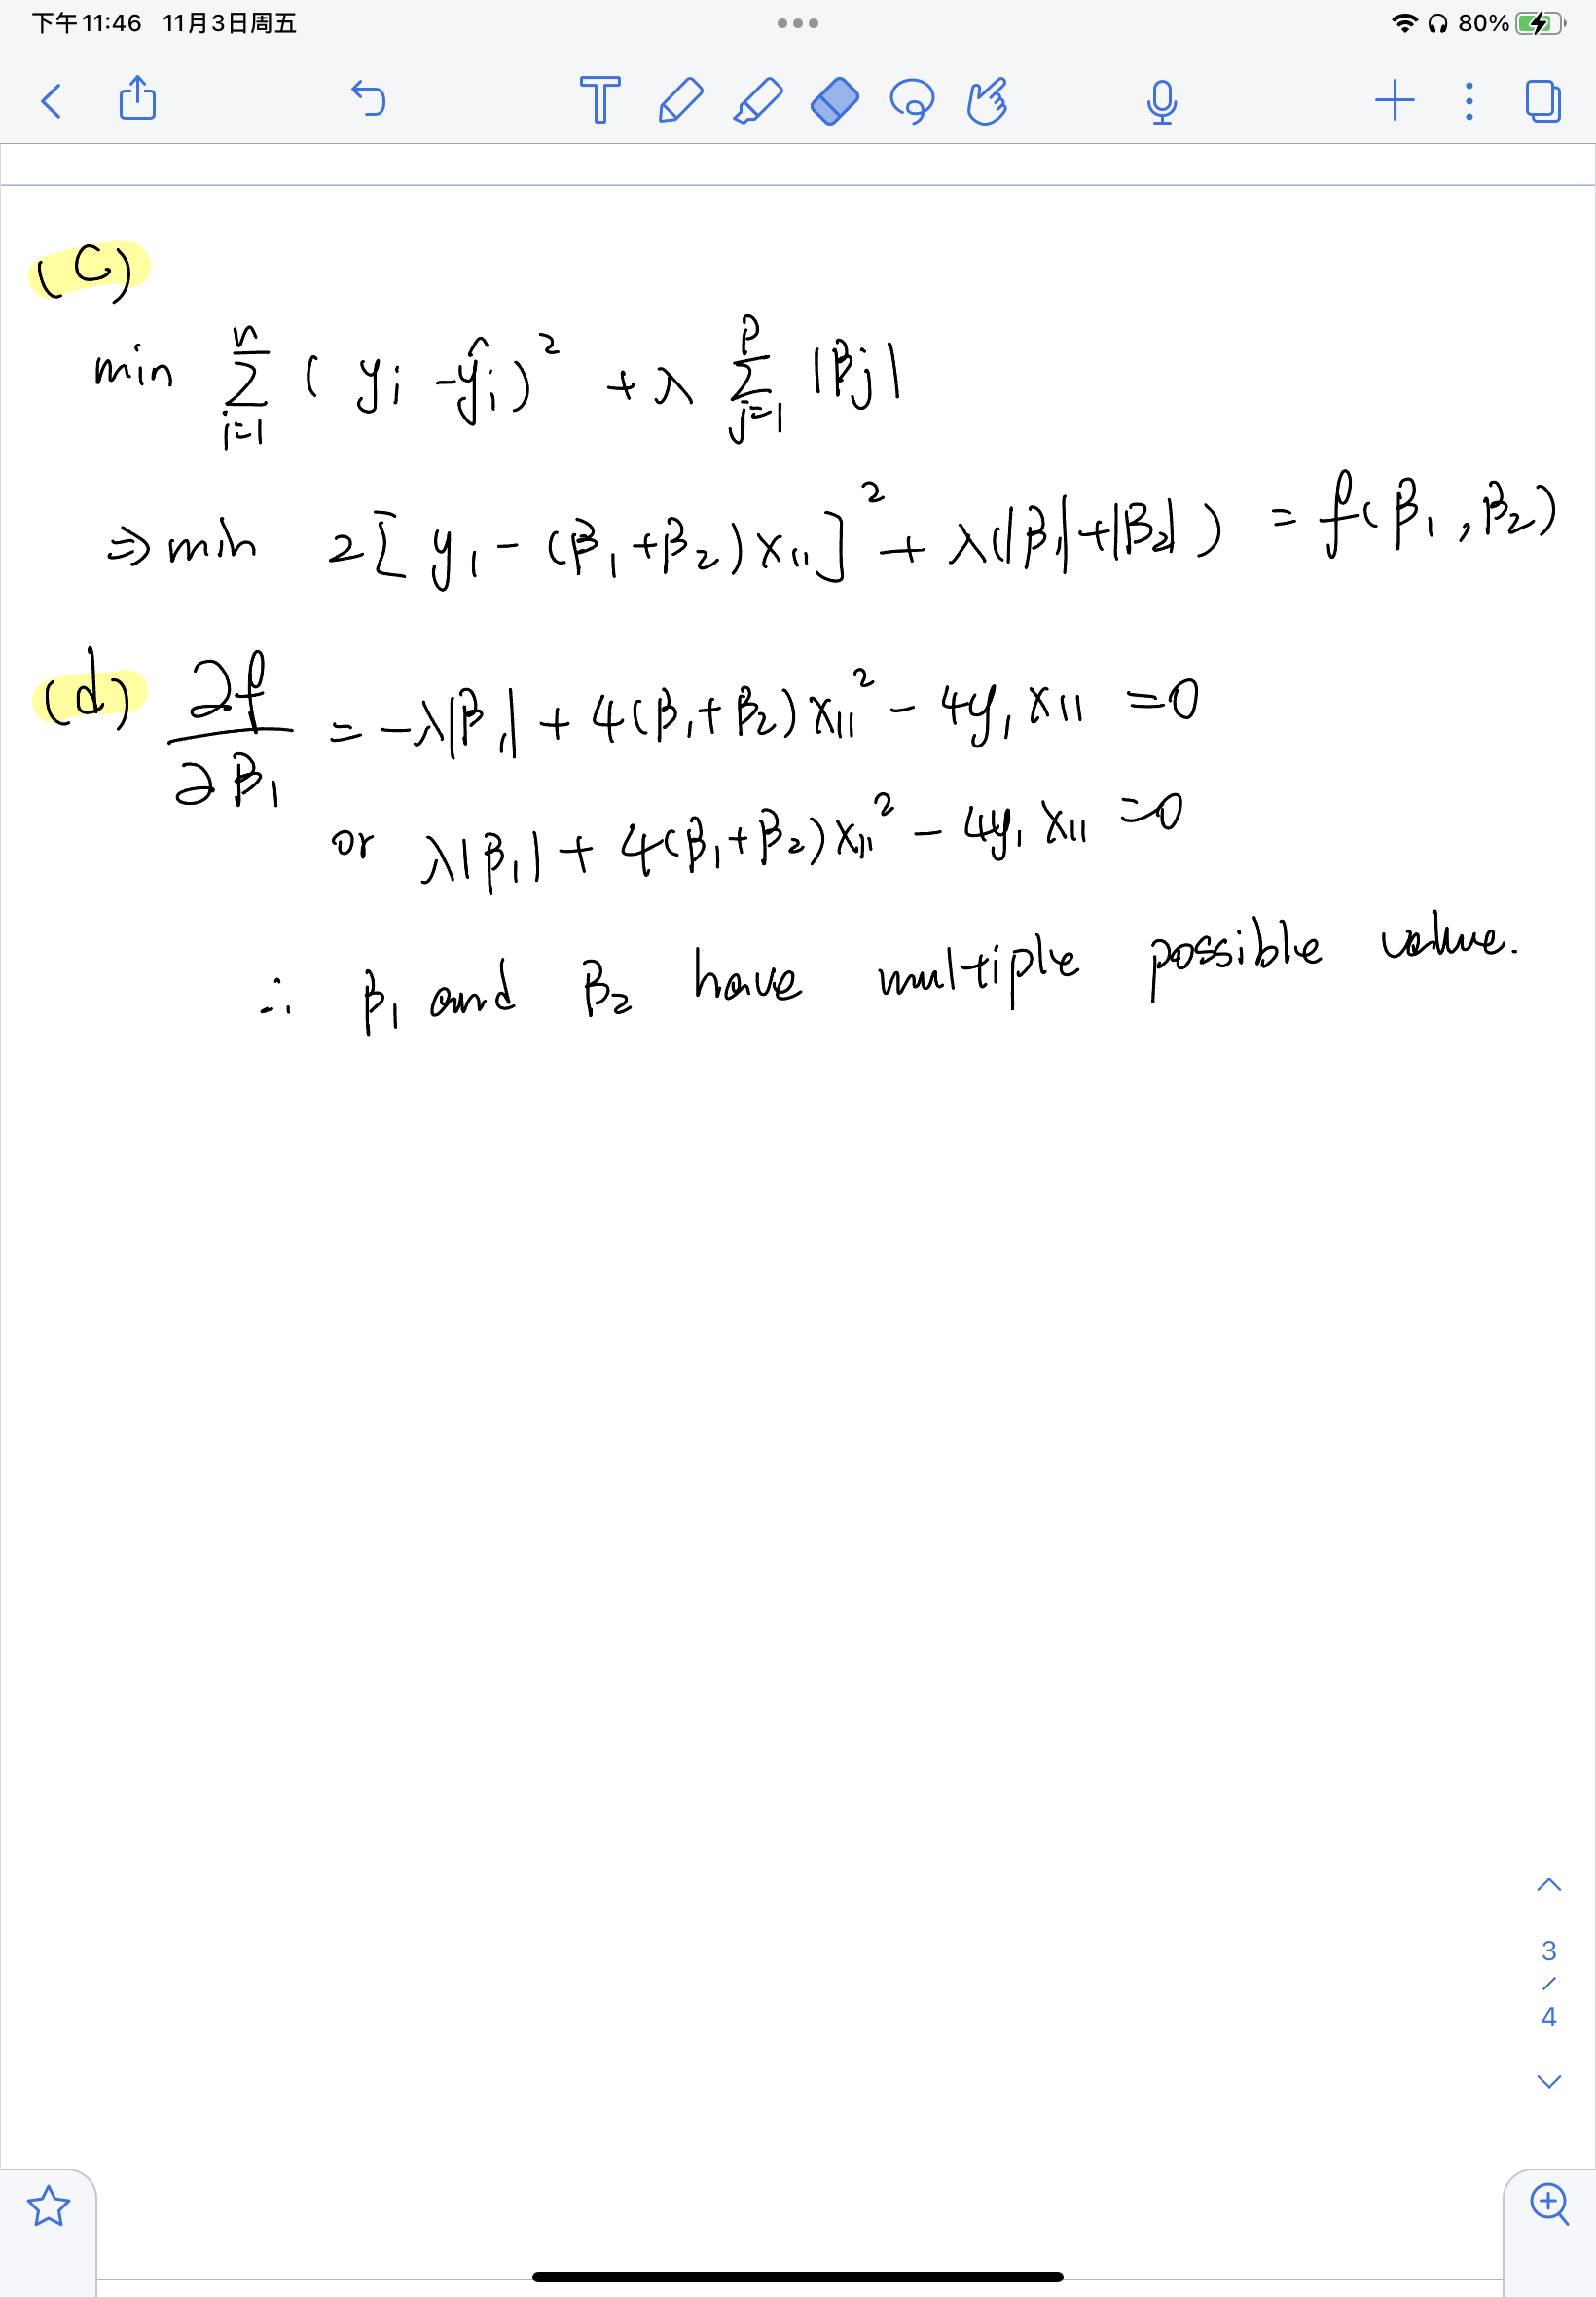

In [137]:
image_path = '/Users/daiqiaochu/Downloads/IMG_0259.PNG'

display(Image(filename=image_path, width=800, height=600))

### 4. ISLR 8.4.5
Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

Answer: 

Majority vote: P(Class is Red|X)=0.6, thus class is red. 

Average probability: average P(Class is Red|X)=0.45, thus class is green. 

### 5. ISLR 9.7.3
Here we explore the maximal margin classifier on a toy data set.

##### (a) We are given n=7 observations in p=2 dimensions. For each observation, there is an associated class label. Sketch the observations

In [127]:
data={'X1':[3,2,4,1,2,4,4],'X2':[4,2,4,4,1,3,1],'Y':['red','red','red','red','blue','blue','blue']}
df = pd.DataFrame(data)
df

,X1,X2,Y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


<AxesSubplot:xlabel='X1', ylabel='X2'>

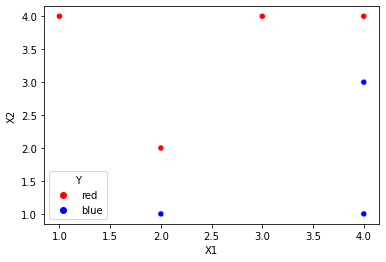

In [128]:
sns.scatterplot(data=df, x="X1", y="X2", hue="Y", palette=['red', 'blue'])

In [129]:
df['Y'].replace({'red': 0, 'blue': 1}, inplace=True)
x_train = df.drop(['Y'], axis=1)
y_train = df['Y']
x_train

,X1,X2
0,3,4
1,2,2
2,4,4
3,1,4
4,2,1
5,4,3
6,4,1


In [130]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1000)
model.fit(x_train, y_train)

SVC(C=1000, kernel='linear')

In [131]:
y_pred = model.predict(x_train)
y_pred

array([0, 0, 0, 0, 1, 1, 1])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/var/folders/30/_l8lwdk51y7b9tjzyyf34j1w0000gn/T/ipykernel_5610/2145688441.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  lines1 = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,


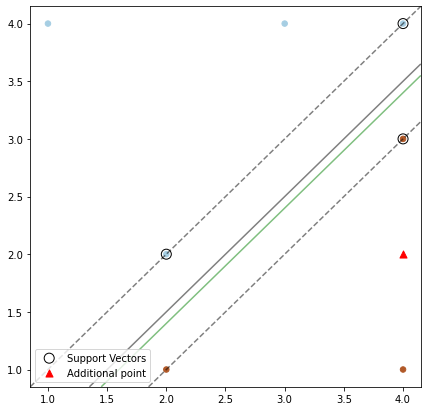

[-1.0004096] [[ 1.9998464 -1.9996928]]


In [132]:
sample_df = df
# plot graph
fig, ax = plt.subplots(figsize=(7, 7))

# scatter plot of sample points
ax.scatter(sample_df.iloc[:, 0], sample_df.iloc[:, 1], 
           c=sample_df.iloc[:, -1], s=30, 
           cmap=plt.cm.Paired)

# create a grid
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# hyperplane
lines1 = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], label="Decision Boundary")

# support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label="Support Vectors")

# a hyperplane that is not optimal
lines2 = ax.contour(XX, YY, Z - 0.2, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])

# point make the data NOT linear-separable
ax.scatter([4.0], [2.0], color='r', marker='^', s=50, label="Additional point")

ax.legend()
plt.show()

print(model.intercept_, model.coef_)

##### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))

Anwer: The solid black line is the hyperplane

##### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if , and classify to Blue otherwise.” Provide the values for .

Answer: B0=1, B1=-1, B2=2(B is Beta)

if B0+B1X1+B2X2>0, class is red, otherwise, class is green. 

##### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

Answer: The dashed line is the maximal margin.

##### (e) Indicate the support vectors for the maximal margin classifier.

Answer: The circled ones are the support vectors

##### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane

Answer: The seventh point is far away from the maximal margin hyperplane. So it would not effect the result. 

##### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

Answer: The solid green line

##### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane

Answer: The new point marked as a red triangle. This makes the points from an XOR pattern which is not linearly separable.

In [ ]:
a=